Exercise 11

Oct 16, 2019. Due Oct 21, 9am.

Enter the names, and describe the contributions of anybody besides yourself who contributed/collaborated.


## 1 Exception handling & Dictionaries
A common philosophy in python code is: “easier to ask for forgiveness than permission.” That is,
instead of checking if something is a valid operation, try it and deal with it in case it fails.
Suppose you have a file with two columns of words (separated by whitespace), a bit like a dictionary in the literal sense of the word. Write a function `read_dict(fname)` that takes a filename, `fname`, as its argument and returns a dictionary built from the two columns - using the first column as keys and second column as values. Write your function
such that itt will not be interrupted by an exception when trying to open a file that does not
exist. If the file does not exist your function should return None. There is a file `word_pairs.txt` that you can test with. Your function should also not crash if a line is blank or contains only a single word. In either case it should ignore the line. 

You should remove all leading and trailing whitespace and convert both columns to lowercase before adding to your dictionary.

In [1]:
def read_dict(fname):
    wordls = dict()    
    words = []
    try:
        f = open(fname,"r")
    except: 
        return None
    
    text = f.readlines()
    for i in range(len(text)):
        text[i] = text[i].strip()
        words = text[i].split()
        
        if(len(words)==2):
            wordls[words[0]] = words[1]
    return wordls

In [2]:
# check that the function runs
d = read_dict("word_pairs.txt")


In [3]:
# check that it finds the right words
assert d['abashed'] == "ashamed"
assert d['abuse'] == "slander"


In [4]:
# check that whitespace is removed
assert d["absolute"] == "eternal"

In [5]:
# check that capitals were dealt with

In [6]:
# check that capitals were dealt with

In [7]:
# Check that it works if the file doesn't exist

In [8]:
# Check that it works with a different word file

In [9]:
# Check that blank or single-word lines are ok

## 2 Numerical differentiation
The derivative of a differentiable function can be defined as

$$ \frac{df(x)}{dx} = \lim\limits_{h \to 0} \frac{f(x+h)-f(x)}{h}$$

Finite difference methods of numerical differentiation use this definition to compute an (approximate) derivative for a function using a small but finite h. 

In the first cell below, write a function `deriv(f, x, h)` that takes a function object f, a position x, and a parameter h. It should return an approximation for the derivative df(x)/dx given by the above equation. Make sure your function accepts arrays (for x).



In [10]:
def deriv(f,x,h):
    return (f(x+h)-f(x))/h


In [11]:
# check deriv works with single values
from numpy.testing import assert_equal, assert_almost_equal
import numpy as np
def mm(x):
    return x*x-1
aa = deriv(mm, 0.5,0.001)
assert_almost_equal(aa, 1.0010, 5)

In [12]:
# check it works with arrays
b = np.linspace(0,1,10)
aa = deriv(mm, b, 0.002)
assert_almost_equal(aa, [2.00000000e-03, 2.24222222e-01, 4.46444444e-01, 6.68666667e-01,
 8.90888889e-01, 1.11311111e+00, 1.33533333e+00, 1.55755556e+00, 1.77977778e+00, 2.00200000e+00],5)

In the next cell, Define a function f(x) = sin(x) + 1.2x, and use your earlier `deriv(x)` function to calculate values of its derivative between -2$\pi$ and 2$\pi$ using h = 0.01. Plot these values, along with the analytical derivative, in one subplot. In a second subplot, plot the difference between your numerical derivative and the analytical value. Use enough points along the x axis that the curves are smooth. Use a labelled legend box to indicate which curve is which.


In [13]:
import matplotlib.pyplot as plt
import numpy as np
def realDerv(x):
    return np.cos(x) + 1.2

def func(x):
    return np.sin(x)+1.2*x

xvals = np.linspace(-2*np.pi, 2*np.pi,50)
yvals = deriv(func,xvals,0.01)
dyvals = realDerv(xvals)

plt.subplot(2,1,1)
plt.plot(xvals, yvals, label = "Numerical derivative" )
plt.plot(xvals, dyvals, label = "Analytical derivative")
plt.legend()

plt.subplot(2,1,2)
plt.plot(xvals,yvals-dyvals, label = "Numerical minus Analytical values")
plt.legend(loc = "upper right")

plt.show()

<Figure size 640x480 with 2 Axes>

Very approximately (ie, order of magnitude), what range of h can you use for the derivative to be correct within, say 1%?

How does that range of h change if you modify the derivative formula to:
$$ \frac{df(x)}{dx} = \lim\limits_{h \to 0} \frac{f(x+h/2)-f(x-h/2)}{h}$$

As an aside, exploiting the Cauchy-Riemann equations, the derivative of a holomorphic function
(which applies to most functions you will encounter in physics) can be approximated as
$$ \frac{df(x)}{dx} = \lim\limits_{h \to 0} {\Bbb R} \frac{f(x+ih)-f(x)}{ih}$$
For the same h, this formula can be a lot more accurate for small values of h because it doesn't suffer from the same round-off problems the earlier equations do.

In [14]:
def NEWderiv(f,x,h):
    return (f(x+1j*h)-f(x))/(1j*h)

xvals = np.linspace(-2*np.pi, 2*np.pi,50)
yvals = NEWderiv(func,xvals,0.02)
dyvals = realDerv(xvals)


def compare(dy, y_):
    return (abs(y_-dy)/dy)*100


Approximately how small must h be for the derivative to be correct within approximately 1%?

What if the derivative is calculated from x+h/2 to x-h/2 ?

1) h needs to approximately <= 0.02 when using the Cauchy-Riemann equations

2) h needs to be approximate <= 0.3 for the derivative to be correction within 1%

## Newton's Method IV

Here we'll finally make plots like those we saw in Exercise 6 that show which root is converged to from different starting points in the complex plane, for $z^4-1$.

Start by pasting in your `which_roots_z4(z, n)` from Exercise 11 (or use the one from the published solution if you never got yours to work - if you do that, make a comment saying you did so).

Then, construct a 2d array of complex numbers whose real and imaginary parts give the x and y values of grid points spanning -2 to +2. Use 1000 points in each dimension ( $10^6$ points in total). Then call your function 
with this array as z, and n = 100. 

Now to make the image, create a new 3d array of integers, with a shape of (1000, 1000, 3). The last dimension will hold intensities of the red, green, and blue components of the image at each of the 1000x1000 grid points.

Fill in the array so that points that converge to root 0 appear red (255, 0, 0), those that converge to index 1  are blue (0, 0, 255) - and pick two other colours for the other two roots.

Finally you can use `plt.imshow()` to display the image.





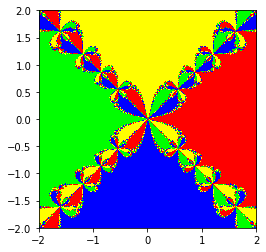

In [20]:
def which_root_z4(z, n):
    roots = np.array([1,1j,-1,-1j])
    
    for i in range(n): #check if it should be n+1
        z_1 = z - f(z)/df(z)
        z = z_1 
    
    c = np.array([z,z,z,z]) #new array
    c[0] = abs(roots[0] - z)
    c[1] = abs(roots[1] - z)
    c[2] = abs(roots[2] - z)
    c[3] = abs(roots[3] - z)
    
    final = np.ndarray(shape = z.shape)
    final = np.argmin(c,axis = 0)
    
    return final

def f(z):
    return (z**4-1)
def df(z):
    return (4*z**3)


x1d = np.linspace(-2,2,1000)
y1d = np.linspace(-2j,2j,1000)
x2d, y2d = np.meshgrid(x1d,y1d)
z= x2d+ y2d

arr = which_root_z4(z,100)

imgarr = np.zeros([1000,1000,3])
imgarr[np.where(arr==0)] = (255, 0, 0)
imgarr[np.where(arr==1)] = (0, 0, 255)
imgarr[np.where(arr==2)] = (0, 255, 0)
imgarr[np.where(arr==3)] = (255, 255, 0)

plt.imshow(imgarr.astype(np.uint8), extent =(-2,2,-2,2))

## Optional Shading Extension

Your image won't have the shading that is found in Exercise 6. There, the shading represents how many iterations were necessary for a given point to converge to within 0.25 of the root.

As an optional extension, you could rewrite your `which_roots_z4()` function so that it returns two arrays: the first would be the same as before - the index to which the point converges. The second array would be the number of iterations required for convergence. Then you could modify the plotting code to use the number of iterations to make those that require more iterations darker.
